In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import os


print(f"     numpy version: {np.__version__}")
print(f"    pandas version: {pd.__version__}")
print(f"   sklearn version: {sklearn.__version__}")
print(f"matplotlib version: {mpl.__version__}")

     numpy version: 1.26.4
    pandas version: 2.2.1
   sklearn version: 1.4.1.post1
matplotlib version: 3.8.3


In [3]:

df = pd.read_csv('./movies.csv')

# Display the first few rows of the DataFrame
print(df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
df = pd.read_csv('./ratings.csv')
print(df.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [5]:
df = pd.read_csv('./links.csv')
print(df.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [6]:
df = pd.read_csv('./tags.csv')
print(df.head())

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [7]:


movies_df = pd.read_csv('./movies.csv')
ratings_df = pd.read_csv('./ratings.csv')
links_df = pd.read_csv('./links.csv')
tags_df = pd.read_csv('./tags.csv')


In [8]:
# Display the first few rows of each DataFrame
print("Movies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nLinks DataFrame:")
print(links_df.head())

print("\nTags DataFrame:")
print(tags_df.head())


Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Links DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        

Summary Statistics for Ratings:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


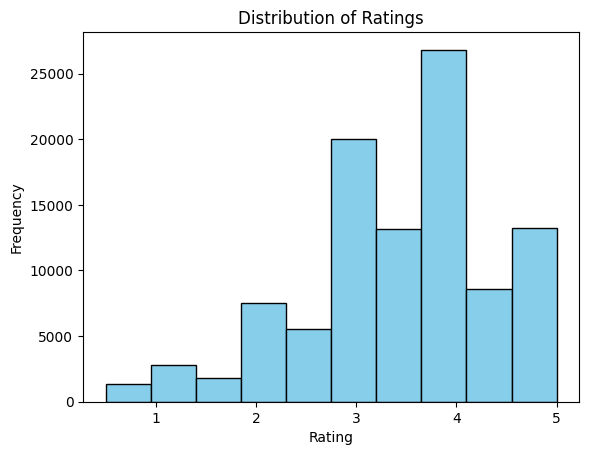

In [9]:
# Compute summary statistics
ratings_summary = ratings_df.describe()
print("Summary Statistics for Ratings:")
print(ratings_summary)

# Visualize the distribution of ratings
import matplotlib.pyplot as plt

plt.hist(ratings_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [10]:
 # Merge ratings and movies DataFrames on movieId
ratings_movies_df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')
print(ratings_movies_df.head())


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [15]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Load data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Merge ratings and movies DataFrames on movieId
ratings_movies_df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')

# Create a graph from the ratings_movies_df DataFrame
G = nx.from_pandas_edgelist(ratings_movies_df, 'userId', 'movieId')

# Detect communities using Louvain algorithm
communities = list(greedy_modularity_communities(G))

# Assign community labels to users in the DataFrame
community_map = {user: idx for idx, com in enumerate(communities) for user in com}
ratings_movies_df['community'] = ratings_movies_df['userId'].map(community_map)

# Print the first few rows of the DataFrame with community information
print(ratings_movies_df.head())





   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  community  
0  Adventure|Animation|Children|Comedy|Fantasy          1  
1                               Comedy|Romance          1  
2                        Action|Crime|Thriller          1  
3                             Mystery|Thriller          1  
4                       Crime|Mystery|Thriller          1  


In [16]:
# Calculate average rating per community
community_avg_rating = ratings_movies_df.groupby('community')['rating'].mean()

# Print average rating for each community
print("Average Rating per Community:")
print(community_avg_rating)

# Calculate most popular movies within each community
community_popular_movies = ratings_movies_df.groupby('community')['title'].value_counts().groupby(level=0).head(3)

# Print most popular movies in each community
print("\nMost Popular Movies per Community:")
print(community_popular_movies)


Average Rating per Community:
community
0    3.587320
1    3.516854
2    3.475748
3    3.112315
4    3.027295
5    2.935897
6    4.250000
Name: rating, dtype: float64

Most Popular Movies per Community:
community  title                                                    
0          Forrest Gump (1994)                                          177
           Matrix, The (1999)                                           175
           Shawshank Redemption, The (1994)                             175
1          Pulp Fiction (1994)                                          146
           Silence of the Lambs, The (1991)                             137
           Jurassic Park (1993)                                         136
2          Pulp Fiction (1994)                                           10
           Fight Club (1999)                                              9
           American Beauty (1999)                                         8
3          Lord of the Rings: The Fellowship

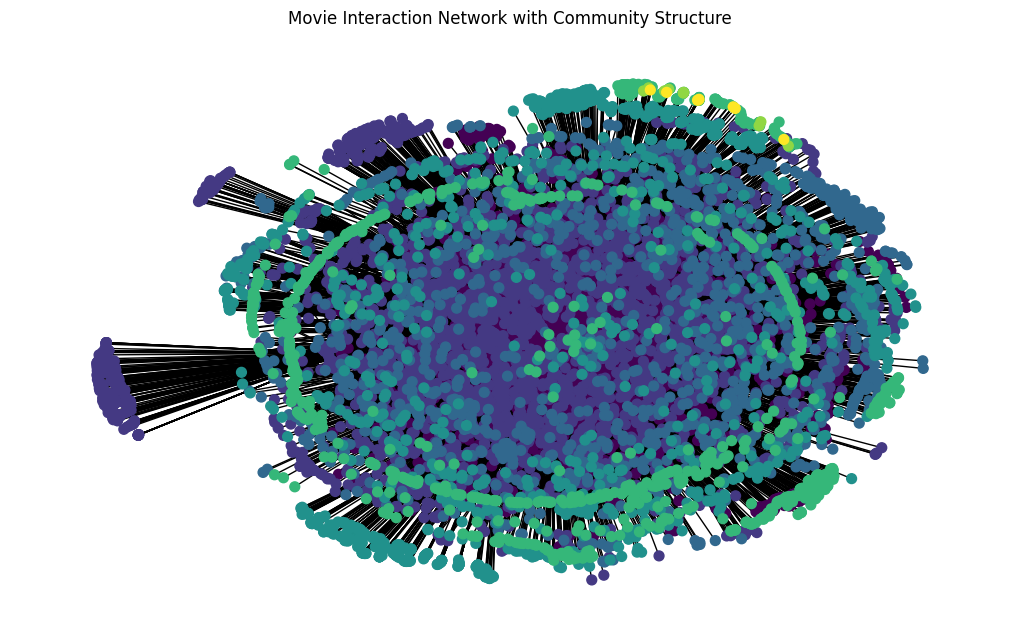

In [17]:
import matplotlib.pyplot as plt

# Draw the graph with nodes colored by community
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, node_color=list(community_map.values()), with_labels=False, node_size=50)
plt.title('Movie Interaction Network with Community Structure')
plt.show()


In [18]:
# Function to get top n recommendations for a user within their community
def get_community_recommendations(user_id, n=5):
    user_community = community_map[user_id]
    user_community_movies = ratings_movies_df[ratings_movies_df['community'] == user_community]
    user_unseen_movies = user_community_movies[~user_community_movies['movieId'].isin(ratings_movies_df[ratings_movies_df['userId'] == user_id]['movieId'])]
    top_n_recommendations = user_unseen_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(n)
    return top_n_recommendations

# Example: Get top 5 recommendations for a user in community 0
user_id = 1
community_recommendations = get_community_recommendations(user_id)
print("Top 5 Recommendations for User", user_id, "in Community", community_map[user_id])
print(community_recommendations)


Top 5 Recommendations for User 1 in Community 1
title
Awful Truth, The (1937)                              5.0
Ballad of Narayama, The (Narayama bushiko) (1983)    5.0
What Happened Was... (1994)                          5.0
Atomic Cafe, The (1982)                              5.0
Slumber Party Massacre II (1987)                     5.0
Name: rating, dtype: float64


In [19]:
# Function to calculate precision at k for a recommender system
def precision_at_k(recommended_movies, actual_movies, k=5):
    recommended_set = set(recommended_movies[:k])
    actual_set = set(actual_movies)
    intersection = recommended_set.intersection(actual_set)
    return len(intersection) / k

# Example: Evaluate precision at 5 for the recommender system
user_id = 1
actual_movies = ratings_movies_df[ratings_movies_df['userId'] == user_id]['title'].tolist()
recommended_movies = get_community_recommendations(user_id).index.tolist()
precision_5 = precision_at_k(recommended_movies, actual_movies, k=5)
print("Precision at 5 for User", user_id, ":", precision_5)


Precision at 5 for User 1 : 0.0
